In [33]:
from scipy import stats
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

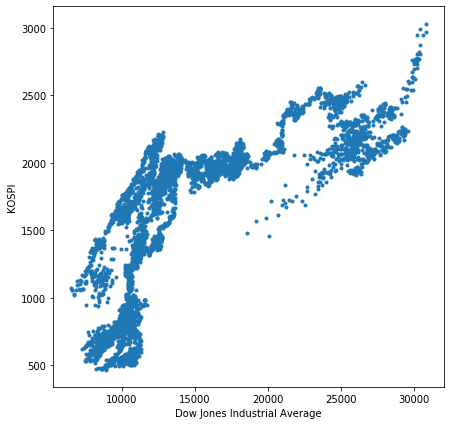

In [34]:
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

plt.figure(figsize=(7,7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [35]:
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.07705867298234498, intercept=455.23561090538624, rvalue=0.7580659824066851, pvalue=0.0, stderr=0.0008986721906406429)

In [36]:
df.corr()
df['DOW'].corr(df['KOSPI'])

0.7580659824066849

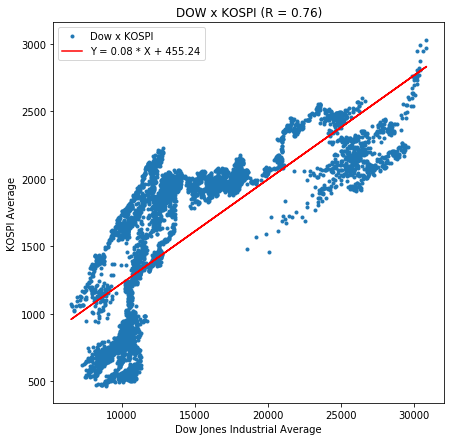

In [37]:
df = pd.DataFrame({'X': dow['Close'], 'Y': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['Dow x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI Average')
plt.show()

In [42]:
s1 = pd.Series([+10, -20, +30, -40, +50])
s2 = pd.Series([+1, -2, +3, -4, +5])
s3 = pd.Series([-10, +20, -30, +40, -50])
df = pd.DataFrame({'S1':s1, 'S2':s2, 'S3':s3})
df.corr()

,S1,S2,S3
S1,1.0,1.0,-1.0
S2,1.0,1.0,-1.0
S3,-1.0,-1.0,1.0
